<a href="https://colab.research.google.com/github/erneyurrego-art/Introducci-n-a-la-IA/blob/main/04_Entrenamiento_con_el_HistGradientBoosting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Machine Learning - Entrenamiento con HistGradientBoosting

En este colab se pasara a desarrollar todo el ciclo de vida de un modelo de machine learning, desde la inspección de los datos, limpieza y transformación y finalmente el entrenamiento del modelo. y Finalmente arrojando el archivo csv para enviar a la competencia de kaggle.

## Inspección de los datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [ ]:
try:
    d = pd.read_csv('train.csv', on_bad_lines='skip')
    display(d.head())
except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: [Errno 2] No such file or directory: 'train.csv'


In [ ]:
d.info()

NameError: name 'd' is not defined

In [ ]:
# distribución de la variable objetivo por el estracto de la vivienda

plt.figure(figsize=(10, 6))
sns.countplot(x ="F_ESTRATOVIVIENDA", hue="RENDIMIENTO_GLOBAL", data=d, palette="bone")
plt.title("Distribución de la variable RENDIMIENTO_GLOBAL por F_ESTRATOVIVIENDA")
plt.show()

In [ ]:
# Distribución de las variables categoricas del dataset

for i, col in enumerate(d.select_dtypes(include=["object"]).columns):

  if i == 0:
    continue # la distribución de E_PRGM_ACADEMICO necesita limpieza

  plt.figure(figsize=(10, 6))
  sns.countplot(data=d, x=col, order=d[col].value_counts().index, color="skyblue", edgecolor="black")
  plt.title(f"Distribución de la variable cualitativa {col}")
  plt.xticks(rotation=45)
  plt.show()

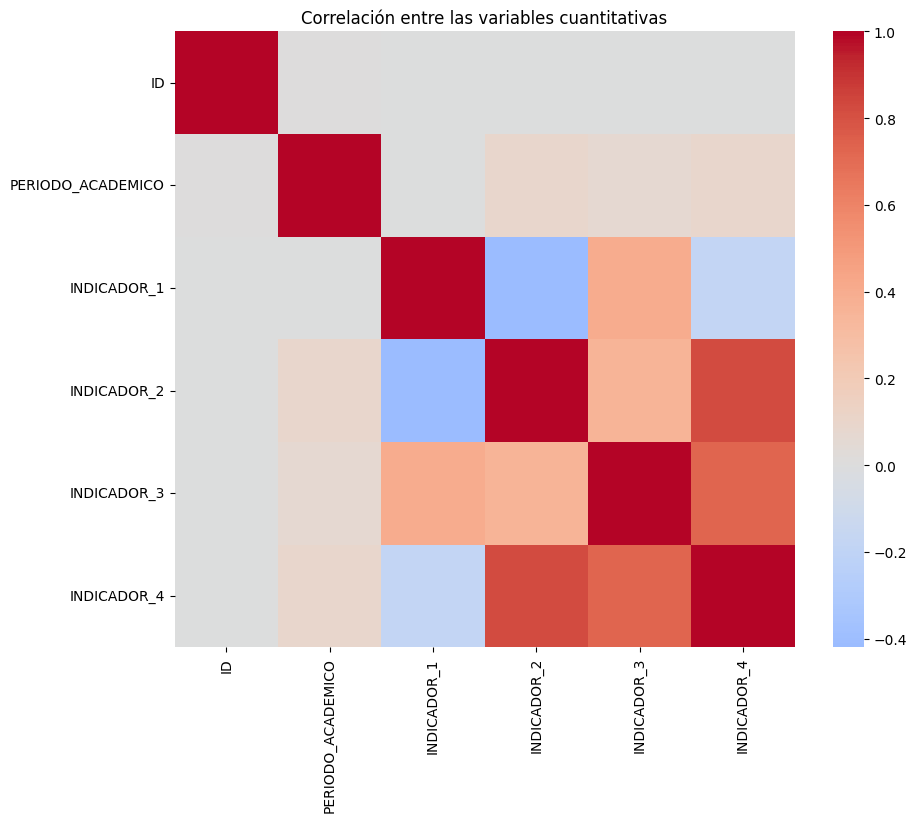

In [ ]:
# Mapa de correlapción
plt.figure(figsize=(10, 8))
sns.heatmap(d.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Correlación entre las variables cuantitativas")
plt.show()

## Limpieza y transformación

Limpieza de los valores nulos con tenicas de llenado clasicos.

In [ ]:
# variable con valores nulos
nullValues = d.isnull().sum()

In [ ]:
# valores nulos
print("Porcentaje de valores nulos por columna")
print(d.isnull().mean()*100)

Porcentaje de valores nulos por columna
ID                             0.000000
PERIODO_ACADEMICO              0.000000
E_PRGM_ACADEMICO               0.000000
E_PRGM_DEPARTAMENTO            0.000000
E_VALORMATRICULAUNIVERSIDAD    0.907870
E_HORASSEMANATRABAJA           4.455884
F_ESTRATOVIVIENDA              4.640722
F_TIENEINTERNET                3.845343
F_EDUCACIONPADRE               3.347004
F_TIENELAVADORA                5.743394
F_TIENEAUTOMOVIL               6.299350
E_PRIVADO_LIBERTAD             0.000000
E_PAGOMATRICULAPROPIO          0.938339
F_TIENECOMPUTADOR              5.502238
F_TIENEINTERNET.1              3.845343
F_EDUCACIONMADRE               3.417184
RENDIMIENTO_GLOBAL             0.000000
INDICADOR_1                    0.000000
INDICADOR_2                    0.000000
INDICADOR_3                    0.000000
INDICADOR_4                    0.000000
dtype: float64


In [ ]:
# llenado de valores nulos
cols_to_fill = nullValues[nullValues/len(d) < 0.07].index.intersection(d.columns)

for col in cols_to_fill:
    d[col] = d[col].fillna(d[col].mode()[0])

print("Valores despues del llenado:")
print(d.isnull().sum())

Valores despues del llenado:
ID                             0
PERIODO_ACADEMICO              0
E_PRGM_ACADEMICO               0
E_PRGM_DEPARTAMENTO            0
E_VALORMATRICULAUNIVERSIDAD    0
E_HORASSEMANATRABAJA           0
F_ESTRATOVIVIENDA              0
F_TIENEINTERNET                0
F_EDUCACIONPADRE               0
F_TIENELAVADORA                0
F_TIENEAUTOMOVIL               0
E_PRIVADO_LIBERTAD             0
E_PAGOMATRICULAPROPIO          0
F_TIENECOMPUTADOR              0
F_TIENEINTERNET.1              0
F_EDUCACIONMADRE               0
RENDIMIENTO_GLOBAL             0
INDICADOR_1                    0
INDICADOR_2                    0
INDICADOR_3                    0
INDICADOR_4                    0
dtype: int64


In [ ]:
d[['F_EDUCACIONMADRE', 'F_EDUCACIONPADRE']] = d[['F_EDUCACIONMADRE', 'F_EDUCACIONPADRE']].replace({
    'No sabe': 'Ninguno',
    'No Aplica': 'Ninguno'
})


In [ ]:
frec = d['E_PRGM_ACADEMICO'].value_counts(normalize=True)
main_categories = frec[frec > 0.01].index
d['E_PRGM_ACADEMICO'] = d['E_PRGM_ACADEMICO'].apply(lambda x: x if x in main_categories else 'OTRA')

In [ ]:
d['E_PRGM_ACADEMICO'].value_counts() # hubo una reducción significativa

,count
E_PRGM_ACADEMICO,
OTRA,291391
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
ADMINISTRACIÓN DE EMPRESAS,24777
INGENIERIA CIVIL,19487
MEDICINA,18099


Transformación de la variables.

In [ ]:
def one_hot_columns(d, columns):
    return pd.get_dummies(d, columns=columns, dtype=int)

In [ ]:
columns_for_one_hot = ['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO']
d = one_hot_columns(d, columns_for_one_hot)

In [ ]:
extract_mapping = {
    'Sin Estrato': 0,
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}

d['F_ESTRATOVIVIENDA'] = d['F_ESTRATOVIVIENDA'].replace(extract_mapping)

/tmp/ipython-input-1778904175.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d['F_ESTRATOVIVIENDA'] = d['F_ESTRATOVIVIENDA'].replace(extract_mapping)


In [ ]:
educational_level_order = [
    'Ninguno',
    'Primaria incompleta',
    'Primaria completa',
    'Secundaria (Bachillerato) incompleta',
    'Secundaria (Bachillerato) completa',
    'Técnica o tecnológica incompleta',
    'Técnica o tecnológica completa',
    'Educación profesional incompleta',
    'Educación profesional completa',
    'Postgrado'
]

payment_order = [
    'No pagó matrícula',
    'Menos de 500 mil',
    'Entre 500 mil y menos de 1 millón',
    'Entre 1 millón y menos de 2.5 millones',
    'Entre 2.5 millones y menos de 4 millones',
    'Entre 4 millones y menos de 5.5 millones',
    'Entre 5.5 millones y menos de 7 millones',
    'Más de 7 millones'
]

hours_order = [
    '0',
    'Menos de 10 horas',
    'Entre 11 y 20 horas',
    'Entre 21 y 30 horas',
    'Más de 30 horas'
]

In [ ]:
def encode_ordinal_columns(d, transformer_column, order):
    encoder = OrdinalEncoder(categories=[order])
    d[transformer_column] = encoder.fit_transform(d[[transformer_column]])
    return d

encode_ordinal_columns(d, 'E_HORASSEMANATRABAJA', hours_order)
encode_ordinal_columns(d, 'E_VALORMATRICULAUNIVERSIDAD', payment_order)
encode_ordinal_columns(d, 'F_EDUCACIONMADRE', educational_level_order)
encode_ordinal_columns(d, 'F_EDUCACIONPADRE', educational_level_order)


,ID,PERIODO_ACADEMICO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,...,E_PRGM_DEPARTAMENTO_NORTE SANTANDER,E_PRGM_DEPARTAMENTO_PUTUMAYO,E_PRGM_DEPARTAMENTO_QUINDIO,E_PRGM_DEPARTAMENTO_RISARALDA,E_PRGM_DEPARTAMENTO_SAN ANDRES,E_PRGM_DEPARTAMENTO_SANTANDER,E_PRGM_DEPARTAMENTO_SUCRE,E_PRGM_DEPARTAMENTO_TOLIMA,E_PRGM_DEPARTAMENTO_VALLE,E_PRGM_DEPARTAMENTO_VAUPES
0,904256,20212,6.0,1.0,3,Si,5.0,Si,Si,N,...,0,0,0,0,0,0,0,0,0,0
1,645256,20212,4.0,0.0,3,No,6.0,Si,No,N,...,0,0,0,0,0,0,0,0,0,0
2,308367,20203,4.0,4.0,3,Si,4.0,Si,No,N,...,0,0,0,0,0,0,0,0,0,0
3,470353,20195,5.0,0.0,4,Si,0.0,Si,No,N,...,0,0,0,0,0,1,0,0,0,0
4,989032,20212,4.0,3.0,3,Si,2.0,Si,Si,N,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,2.0,2.0,2,Si,4.0,Si,No,N,...,0,0,0,0,0,0,0,0,0,0
692496,754213,20212,4.0,4.0,3,Si,1.0,Si,No,N,...,1,0,0,0,0,0,0,0,0,0
692497,504185,20183,3.0,1.0,3,Si,4.0,Si,No,N,...,0,0,0,0,0,0,0,0,0,0
692498,986620,20195,4.0,1.0,1,No,2.0,No,No,N,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
def replace_binary_columns(d, columns, mapping):
  for col in columns:
    d[col] = d[col].map(mapping)

  return d

In [ ]:
cols_si_no = ['F_TIENEINTERNET', 'F_TIENEAUTOMOVIL', 'F_TIENECOMPUTADOR', 'E_PAGOMATRICULAPROPIO', 'F_TIENELAVADORA']
cols_s_n = ['E_PRIVADO_LIBERTAD']

In [ ]:
d = replace_binary_columns(d, cols_si_no, {'No': 0, 'Si': 1})
d = replace_binary_columns(d, cols_s_n, {'N': 0, 'S': 1})

In [ ]:
try :
    orden_rendimiento = {
    'bajo': 0,
    'medio-bajo': 1,
    'medio-alto': 2,
    'alto': 3
    }

    d['RENDIMIENTO_GLOBAL'] = d['RENDIMIENTO_GLOBAL'].replace(orden_rendimiento)
except Exception as e:
    print(f"An error occurred: {e}")

/tmp/ipython-input-199998760.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d['RENDIMIENTO_GLOBAL'] = d['RENDIMIENTO_GLOBAL'].replace(orden_rendimiento)


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 71 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   ID                                                    692500 non-null  int64  
 1   PERIODO_ACADEMICO                                     692500 non-null  int64  
 2   E_VALORMATRICULAUNIVERSIDAD                           692500 non-null  float64
 3   E_HORASSEMANATRABAJA                                  692500 non-null  float64
 4   F_ESTRATOVIVIENDA                                     692500 non-null  int64  
 5   F_TIENEINTERNET                                       692500 non-null  int64  
 6   F_EDUCACIONPADRE                                      692500 non-null  float64
 7   F_TIENELAVADORA                                       692500 non-null  int64  
 8   F_TIENEAUTOMOVIL                            

## Entrenamiento y construcción del modelo de machine learning con el algoritmo de HistGradientBoosting

1. Creación del modelo
2. Entrenamiento
3. Prdiccion
4. Accurracy and score del modelo con test

 HistGradientBoosting es un algoritmo de aprendizaje que es aplicado para problemas o tareas de clasificación como de regresión y de clasificación debido a su alta precisión predictiva

 Además cuenta con algunos veneficios adicionales de los algoritmos convencionales como:

 * Reducir la complejidad computacional y el uso de memoria
 * Hacer factible entrenar modelos en grandes conjuntos de datos

In [ ]:
# importaciones de las bibliotecas utilizadas
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


/usr/local/lib/python3.12/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Cargar el dataset ya limpio del paso anterior

In [ ]:
# cargar el dataset
try:
  d = pd.read_csv('clean_dataset.csv', on_bad_lines='skip')
  display(d.heap())
except Exception as e:
  print(e)


'DataFrame' object has no attribute 'heap'


In [ ]:
# Particionamiento del dataset en los datos de train y de test
d['RENDIMIENTO_GLOBAL']

X = d.drop('RENDIMIENTO_GLOBAL', axis=1)
y = d['RENDIMIENTO_GLOBAL']

xtr, xts, ytr, yts = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Tamaño del dataset original: ", d.shape)
print("Tamaño del dataset de entrenamiento: ", xtr.shape)
print("Tamaño del dataset de test: ", xts.shape)

Tamaño del dataset original:  (692500, 69)
Tamaño del dataset de entrenamiento:  (484750, 68)
Tamaño del dataset de test:  (207750, 68)


Pequeña vista del funcionamiento del algoritmo de HistGradientBoosting con una configuración base para ver que resultados arroja y luego buscar los mejores parametros hacer pruebas y entrenar el modelo con los mejores parametros.

In [ ]:
# Entrenamiento base del modelo para ver una primera vista del algoritmo
model = HistGradientBoostingClassifier(max_bins=255, max_iter=100)
model.fit(xtr, ytr)
y_pred = model.predict(xts)
accuracy = accuracy_score(yts, y_pred)
print("Accuracy:", accuracy)

### Entrenamiento con una muestra de los datos del dataset

Para encontrar y probar diferentes parametros de forma eficiente se tomaran muestras del dataset más pequeñas para poder optimizar el tiempo que le toma las herramientas de sklearn para probar estos parametros y dar resultados, luego se entrena el modelo con el dataset real o con los datos totales con los parametros encontrados y empezar la optimización y cambios de estos.

In [ ]:
# Particionamiento de las x & y
X_sample = X.sample(frac=0.2, random_state=42)
y_sample = y.loc[X_sample.index]

X_sample.shape, y_sample.shape

((138500, 68), (138500,))

In [ ]:
X_sample_train, X_sample_val, y_sample_train, y_sample_val = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

X_sample_train.shape, X_sample_val.shape

((110800, 68), (27700, 68))

In [ ]:
# algoritmo
hgb = HistGradientBoostingClassifier()

In [ ]:
# conjunto de combinación de parametros
param_distributions = {
    "learning_rate": [0.01, 0.03, 0.05, 0.07, 0.1],
    "max_iter": [100, 200, 300, 400, 500],
    "max_leaf_nodes": [15, 31, 63, 127],
    "min_samples_leaf": [10, 20, 30, 50, 100],
    "l2_regularization": [0.0, 0.1, 0.3, 0.5, 1.0],
    "max_bins": [128, 255],
    "early_stopping": [True],
    "validation_fraction": [0.1, 0.15],
    "max_depth": [None, 5, 7, 9],
}

In [ ]:
# hacer la busquedad con RandomizedSearchCV

search = RandomizedSearchCV(
    estimator=HistGradientBoostingClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=40,               # número de combinaciones aleatorias a probar
    cv=3,                    # 3-fold cross-validation
    scoring='accuracy',      # o 'f1_macro' si hay clases desbalanceadas
    verbose=2,
    random_state=42,
    n_jobs=-1                # usa todos los núcleos del CPU
)

search.fit(X_sample_train, y_sample_train)

print("Mejores parámetros encontrados: ", search.best_params_)
print("Mejor puntuación de validación cruzada: ", search.best_score_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Mejores parámetros encontrados:  {'validation_fraction': 0.1, 'min_samples_leaf': 50, 'max_leaf_nodes': 127, 'max_iter': 400, 'max_depth': 5, 'max_bins': 128, 'learning_rate': 0.05, 'l2_regularization': 0.0, 'early_stopping': True}
Mejor puntuación de validación cruzada:  0.41589351514993583


Entrenamiento del modelo con los parametros encontrados anteriormente con el RandomizedSearchCV

In [ ]:
# particiones reales del dataset

xtr.shape, ytr.shape

((484750, 68), (484750,))

Con los parametros que me arrojo el RandomizedSearchCV realice el entrenamiento del modelo pero no me arrojo un buen resultado en comparación con el RandomForest que aunque es un poco mejor la diferencia no esta notable

* Parametros del entrenamiento: ```validation_fraction=0.1, min_samples_leaf=50, max_leaf_nodes=127, max_iter=400, max_depth=5, max_bins=128, learning_rate=0.05, l2_regularization=0.0, early_stopping=True```

In [ ]:
model = HistGradientBoostingClassifier(validation_fraction=0.1, min_samples_leaf=50, max_leaf_nodes=127, max_iter=400,
                                       max_depth=5, max_bins=128, learning_rate=0.05, l2_regularization=0.0, early_stopping=True,
                                       random_state=42)

# 2. ajuste del modelo
model.fit(xtr, ytr)

HistGradientBoostingClassifier(early_stopping=True, learning_rate=0.05,
                               max_bins=128, max_depth=5, max_iter=400,
                               max_leaf_nodes=127, min_samples_leaf=50,
                               random_state=42)

In [ ]:
# validation_fraction=0.1, min_samples_leaf=50, max_leaf_nodes=127, max_iter=400, max_depth=5, max_bins=128, learning_rate=0.05, l2_regularization=0.0, early_stopping=True, random_state=42)
# Accuracy en entrenamiento:  0.4375430634347602
# Accuracy en test:  0.4202454873646209

In [ ]:
model = HistGradientBoostingClassifier(validation_fraction=0.1, min_samples_leaf=50, max_leaf_nodes=127, max_iter=800,
                                       max_depth=7, max_bins=255, learning_rate=0.03, l2_regularization=0.0, early_stopping=True,
                                       random_state=42)

# 2. ajuste del modelo
model.fit(xtr, ytr)

HistGradientBoostingClassifier(early_stopping=True, learning_rate=0.03,
                               max_depth=7, max_iter=800, max_leaf_nodes=127,
                               min_samples_leaf=50, random_state=42)

In [ ]:
# 3. prediccion del modelo

y_pred_train = model.predict(xtr)
y_pred_test = model.predict(xts)

In [ ]:
# 4. mostrar resultados del entrenamiento

print(classification_report(yts, y_pred_test))
print(confusion_matrix(yts, y_pred_test))8













                                                                                                                                                        6

              precision    recall  f1-score   support

           0       0.44      0.55      0.49     51896
           1       0.33      0.27      0.29     51682
           2       0.32      0.25      0.28     51486
           3       0.53      0.61      0.57     52686

    accuracy                           0.42    207750
   macro avg       0.40      0.42      0.41    207750
weighted avg       0.40      0.42      0.41    207750

[[28497 11217  7118  5064]
 [18867 13724 10651  8440]
 [11812 11358 12810 15506]
 [ 5235  5701  9395 32355]]


In [ ]:
# 5. mostrar el accuracy del modelo
accuracy_train = accuracy_score(ytr, y_pred_train)
accuracy_test = accuracy_score(yts, y_pred_test)

print("Accuracy en entrenamiento: ", accuracy_train)
print("Accuracy en test: ", accuracy_test)

Accuracy en entrenamiento:  0.4602372356884992
Accuracy en test:  0.42063056558363415


In [ ]:
# 6. Mostrar si hay overfitting o underfitting

if accuracy_train - accuracy_test > 0.1:
  print("Overfitting")
elif accuracy_test - accuracy_train > 0.1:
  print("Underfitting")
else:
  print("El modelo no tiene Overfitting o Underfitting")

El modelo no tiene Overfitting o Underfitting


### Predicción para la competencia

luego de hacer la etapa de entrenamiento pasamos a la parte de predecir el dataset de test para montarlo en la competencia de kaggle.

In [ ]:
y_pred_final = model.predict(test)

sumbit = pd.DataFrame({'id': test.index, 'RENDIMIENTO_GLOBAL': y_pred_final})

submit.to_scv("subbmission.csv", index=False)